In [1]:
from sklearn.datasets import load_iris

In [3]:
iris =load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
X.shape, y.shape

((150, 4), (150,))

In [10]:
import pandas as pd
import numpy as np

In [13]:
x1 = pd.DataFrame(X)
x1.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.neighbors import KNeighborsClassifier
imodel = KNeighborsClassifier(n_neighbors=1)

In [23]:
imodel.fit(X,y)
y_pred = imodel.predict(X)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)*100  # training error

100.0

### Model Validation 

In [31]:
# one holdout set

from sklearn.model_selection import train_test_split
# split the dara with 20% in each set as test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    train_size=0.2)

imodel.fit(X_train, y_train) # fit the model on one set of data

KNeighborsClassifier(n_neighbors=1)

In [33]:
# evaluate the model on the second set of data
y2_pred = imodel.predict(X_test)
accuracy_score(y_test, y2_pred)*100

97.5

### Cross validation

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(imodel, X, y, cv=3)

array([0.98, 0.94, 0.96])

In [52]:
cross_val_score(imodel, X, y,cv=5).mean()

0.96

In [50]:
# One Leave out

from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(imodel, X, y, cv=loo, n_jobs=-1)


In [49]:
scores.mean()

0.96

### Validation curve 

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression( degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [54]:
import numpy as np

In [58]:
# make data

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1)**2
    y = 10 - 1.0 / ( X.ravel() + 0.1 )
    
    if err > 0 :
        y += err * rng.randn(N)
    return X, y



In [66]:
X, y = make_data(40)

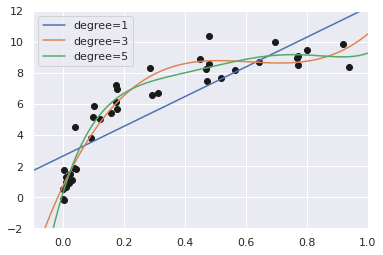

In [67]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # plot formating

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color = 'k')
axis = plt.axis()

for degree in [1,3,5]:
    
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree={0}'.format(degree))
    
    plt.xlim(-0.1, 1.0)
    plt.ylim(-2, 12)
    plt.legend(loc = 'best');


### Validation curve 

/home/mack/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


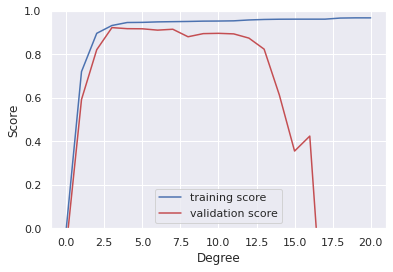

In [69]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score,1), color='b', label='training score')
plt.plot(degree, np.median(val_score, 1 ), color='r', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('Degree')
plt.ylabel('Score');